# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data Preparation

In [2]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')
train_labels = pd.read_csv('train_labels.csv')

train = train.sample(n=500000, random_state=42, ignore_index=True)
test = test.sample(n=500000, random_state=42, ignore_index=True)

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

In [3]:
data = train.merge(train_labels, on='customer_ID', how='left')

In [4]:
pd.set_option('max_columns', None)

In [5]:
data.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,495825.000000,500000.000000,500000.000000,4.998130e+05,5.000000e+05,407859.000000,499813.000000,4.998130e+05,71511.000000,3.503160e+05,500000.000000,500000.000000,499812.000000,5.000000e+05,500000.0000,390457.000000,500000.000000,435140.000000,500000.000000,499975.000000,500000.000000,498004.000000,216034.000000,500000.000000,5.000000e+05,500000.000000,497313.000000,472725.000000,500000.000000,1.304840e+05,5.000000e+05,5.000000e+05,500000.00000,499813.000000,500000.000000,407859.000000,5.000000e+05,500000.000000,4.832560e+05,229630.000000,4.954970e+05,500000.000000,5.000000e+05,234679.000000,500000.000000,500000.000000,5.000000e+05,445929.000000,499370.000000,500000.000000,431234.000000,500000.000000,500000.000000,500000.000000,500000.000000,2.167130e+05,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,5.000000e+05,4.824110e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.00000,5.000000e+05,4980.000000,500000.000000,500000.000000,500000.000000,56354.000000,5.000000e+05,500000.000000,2.728620e+05,499370.000000,4.998130e+05,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,4.998130e+05,500000.000000,500000.000000,5.000000e+05,499997.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,3.450500e+04,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,541.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,498345.000000,499955.000000,498387.000000,498852.000000,4.999410e+05,4.963750e+05,500000.000000,490842.000000,226920.000000,500000.000000,500000.000000,5.000000e+05,499995.000000,500000.000000,488433.000000,500000.000000,500000.000000,500000.000000,2896.000000,500000.000000,3107.000000,4.997540e+05,4.999950e+05,3.736940e+05,500000.00000,500000.000000,4.840330e+05,500000.000000,500000.000000,4.840330e+05,4.840330e+05,500000.000000,484033.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,490842.000000,500000.000000,500000.000000,6539.000000,490842.000000,490842.000000,48841.000000,4.961730e+05,500000.000000,17561.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,490842.000000,85477.000000,500000.000000,4.963700e+05,500000.000000,500000.000000
mean,0.656343,5.028996,0.123915,6.210809e-01,7.851905e-02,0.225575,0.055155,1.325365e-01,0.184642,1.547368e-01,0.811212,13.071228,0.251775,8.313605e-02,0.0424,0.475457,0.406824,0.381122,0.400236,0.155715,0.186204,0.447516,0.173965,0.419926,1.896649e-01,1.158492,0.180271,0.601304,0.226561,7.631088e-02,8.745436e-02,1.108343e-01,0.23911,0.979796,0.026176,0.222857,9.321581e-02,1021.945080,2.977982e-01,0.203565,1.005421e-01,0.058280,2.153819e-01

In [6]:
test.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,497426.000000,500000.000000,500000.000000,4.998470e+05,500000.000000,423249.000000,499847.000000,4.998470e+05,59632.000000,349588.000000,500000.000000,500000.000000,4.998460e+05,5.000000e+05,500000.00000,399070.000000,500000.000000,436146.000000,500000.000000,499844.000000,500000.000000,495376.000000,214627.000000,500000.000000,5.000000e+05,500000.000000,498677.000000,480446.000000,500000.000000,1.306570e+05,5.000000e+05,5.000000e+05,500000.000000,499847.000000,500000.000000,423249.000000,500000.000000,500000.000000,467415.000000,248640.000000,4.974020e+05,500000.000000,5.000000e+05,3.242860e+05,500000.000000,500000.000000,5.000000e+05,445633.000000,499367.000000,500000.000000,416828.000000,500000.000000,500000.000000,500000.000000,500000.000000,2.308920e+05,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,499912.000000,5.000000e+05,500000.000000,5.000000e+05,4.873770e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,5.000000e+05,6602.000000,500000.000000,500000.000000,500000.000000,5.200800e+04,5.000000e+05,500000.000000,255279.000000,499367.000000,4.998470e+05,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,4.998470e+05,500000.000000,500000.000000,4.994850e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,1.245580e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,505.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,497268.000000,499938.000000,497322.000000,498816.000000,4.998440e+05,4.990060e+05,500000.000000,495805.000000,232366.000000,500000.000000,500000.000000,5.000000e+05,499923.000000,500000.000000,470901.000000,500000.000000,500000.000000,500000.000000,5141.000000,500000.000000,6138.000000,4.996910e+05,4.999250e+05,3.895820e+05,500000.000000,500000.000000,487585.000000,500000.000000,500000.000000,487585.000000,487585.000000,500000.000000,487585.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,495805.000000,500000.000000,500000.000000,8670.000000,495805.000000,495805.000000,59679.000000,4.988210e+05,500000.000000,15835.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,495805.000000,86326.000000,500000.000000,4.990020e+05,500000.000000
mean,0.657978,5.139532,0.128041,6.160238e-01,0.070186,0.226893,0.055130,1.436544e-01,0.145749,0.161785,0.813304,13.283182,2.460571e-01,8.939561e-02,0.04229,0.471487,0.396309,0.375952,0.763634,0.156076,0.182934,0.488575,0.184464,0.463516,1.881556e-01,1.101674,0.186598,0.599058,0.243293,8.095719e-02,8.881798e-02,1.151444e-01,0.204842,0.980413,0.026368,0.214417,0.103789,1112.999662,0.313902,0.210913,1.105629e-01,0.059140,2.140007e-01,6.275287e-02,0.110745

# Preprocessing

In [7]:
data.fillna(data.median(), inplace=True)

test.fillna(data.median(), inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

# Scaling

In [10]:
data_1 = data[['customer_ID','S_2','target']]
data_2 = data.drop(['customer_ID','S_2','target'], axis=1)

test_1 = test.drop(['customer_ID','S_2'], axis=1)

In [11]:
scaler = MinMaxScaler()
data_3 = scaler.fit_transform(data_2) 

test_2 = scaler.fit_transform(test_1)

In [12]:
data_3 = pd.DataFrame(data=data_3)
data_3.columns = data_2.columns

test_2 = pd.DataFrame(data=test_2)
test_2.columns = test_1.columns

In [13]:
df_final = pd.concat([data_1, data_3], axis=1)

# PCA

In [14]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_final.drop(['customer_ID','S_2','target'], axis=1))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                                                                  'principal component 4', 'principal component 5', 'principal component 6', 
                                                                  'principal component 7', 'principal component 8', 'principal component 9',
                                                                  'principal component 10'])

principalComponents = pca.fit_transform(test_2)
principalDf_1 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                                                                  'principal component 4', 'principal component 5', 'principal component 6', 
                                                                  'principal component 7', 'principal component 8', 'principal component 9',
                                                                  'principal component 10'])

In [15]:
df_final_1 = pd.concat([data_1, principalDf], axis=1)

test_final = principalDf_1

# Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB

In [17]:
train_var = df_final_1.drop(['S_2','target'], axis=1)
test_var = df_final_1['target']
x_train, x_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

id_train = x_train['customer_ID']
id_test = x_test['customer_ID']

x_train = x_train.drop(columns='customer_ID')
x_test = x_test.drop(columns='customer_ID')

In [18]:
x_train_std = x_train
x_test_std = x_test

Average cross validation score: 0.839
[[68919  6366]
 [ 9799 14916]]
accuracy: 0.838
precision: 0.701
recall: 0.604
specificity: 0.915
F1 Score: 0.649
ROC: 0.898


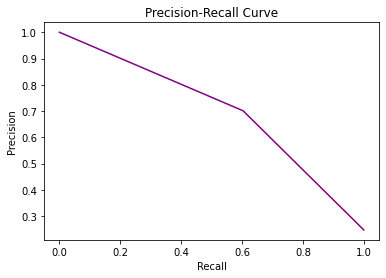

In [19]:
logreg = LogisticRegression(max_iter=500).fit(x_train_std, y_train)
scores = cross_val_score(logreg, x_train_std, y_train, cv=5)
logreg_pred = logreg.predict(x_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, logreg_pred))
print("accuracy: {:.3f}".format(logreg.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, logreg_pred)))
print("recall: {:.3f}".format(recall_score(y_test, logreg_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, logreg_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, logreg_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, logreg_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Average cross validation score: 0.798
[[65019 10266]
 [ 9942 14773]]
accuracy: 0.798
precision: 0.590
recall: 0.598
specificity: 0.864
F1 Score: 0.594
ROC: 0.731


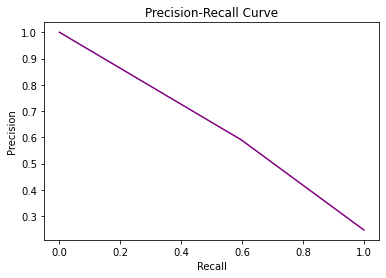

In [20]:
tree = DecisionTreeClassifier().fit(x_train, y_train)
scores = cross_val_score(tree, x_train, y_train, cv=5)
tree_pred = tree.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, tree_pred))
print("accuracy: {:.3f}".format(tree.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, tree_pred)))
print("recall: {:.3f}".format(recall_score(y_test, tree_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, tree_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, tree_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, tree.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, tree_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   


Average cross validation score: 0.853
[[68862  6423]
 [ 8139 16576]]
accuracy: 0.854
precision: 0.721
recall: 0.671
specificity: 0.915
F1 Score: 0.695
ROC: 0.913


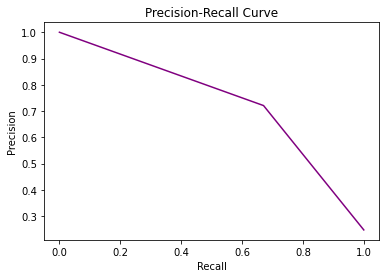

In [21]:
random_forest = RandomForestClassifier().fit(x_train, y_train)
scores = cross_val_score(random_forest, x_train, y_train, cv=5)
rf_pred = random_forest.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, rf_pred))
print("accuracy: {:.3f}".format(random_forest.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, rf_pred)))
print("recall: {:.3f}".format(recall_score(y_test, rf_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, rf_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, random_forest.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, rf_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   


Average cross validation score: 0.835
[[67982  7303]
 [ 9067 15648]]
accuracy: 0.836
precision: 0.682
recall: 0.633
specificity: 0.903
F1 Score: 0.657
ROC: 0.875


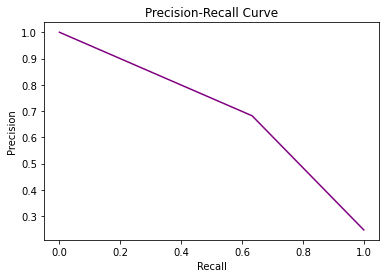

In [22]:
knn = KNeighborsClassifier().fit(x_train, y_train)
scores = cross_val_score(knn, x_train, y_train, cv=5)
knn_pred = knn.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print(confusion_matrix(y_test, knn_pred))
print("accuracy: {:.3f}".format(knn.score(x_test_std, y_test)))
print("precision: {:.3f}".format(precision_score(y_test, knn_pred)))
print("recall: {:.3f}".format(recall_score(y_test, knn_pred)))

tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print("specificity: {:.3f}".format(tn/(tn+fp)))
print("F1 Score: {:.3f}".format(f1_score(y_test, knn_pred)))

print("ROC: {:.3f}".format(roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])))

precision, recall, thresholds = precision_recall_curve(y_test, knn_pred)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()   


# Prediction Data Test

In [23]:
x_test_final = test_final
y_predict_test = random_forest.predict(x_test_final)

In [24]:
target = pd.DataFrame(y_predict_test, columns=['target'])
target

,target
0,0
1,0
2,0
3,1
4,0
...,...
499995,0
499996,0
499997,1
499998,1


In [25]:
final = pd.concat([df_final_1['customer_ID'], target], axis=1)
final

,customer_ID,target
0,b9cdf83627a38ebbfd8b8eb2c943f631fa18ea56731951...,0
1,0b1ecd1e9fd72ebf6e3188c581e90de0210c1d3133b231...,0
2,191091b92233586dde76a982176a9f9e25a2c39640de2d...,0
3,84405a24538c7f1c023c05e613e5a1332880034c594813...,1
4,f8c0112a130a70118e9b4c3442516f2853bcd01b4fd715...,0
...,...,...
499995,8bc0d318d11059da6aa711058d69eb5ee43d035ee56867...,0
499996,ee486f1b8663e15977a0ac7d2eb2b25a5fa7e48b4eee7c...,0
499997,d40ce7b2c20a15eb0c0a8cf2da9054d6d666df683b04d2...,1
499998,12fd52fd24aba0215e31fb5cae68d215b73932321137da...,1
